In [1]:
import FlowCal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import seaborn as sns
import os

In [3]:
folder_c = "~/PATH_TO/Facsdata/PCdBB20220511/K562/PCdBBmM MACS/20220511/"

In [4]:
folder_b = "~/PATH_TO/Facsdata/PCdBB20220511/PCdBB/PCdBBmM MACS/PCdBB check 20220511/"

In [6]:
out_folder = "~/PATH_TO/Facsdata/processed/20220511_out/"
os.mkdir(out_folder[:-1])

In [7]:
filenames_c = ['K562-T24VCy5_K562 UV-PCdBB+.fcs', \
             'K562-T24VCy5_K562 UV+PCdBB-.fcs', \
             'K562-T24VCy5_K562 UV+pcdBB+.fcs']

In [8]:
filenames_b = ['PCdBB-bcd-biotin_UV- T24V-Cy5.fcs', \
             'PCdBB-bcd-biotin_UV+ T24V-Cy5.fcs']

In [9]:
col = ['b', 'g', 'r']

In [10]:
plt.rcParams['font.family'] = 'Helvetica' 
plt.rcParams["font.size"] = 15 
plt.rcParams['xtick.labelsize'] = 15 
plt.rcParams['ytick.labelsize'] = 15

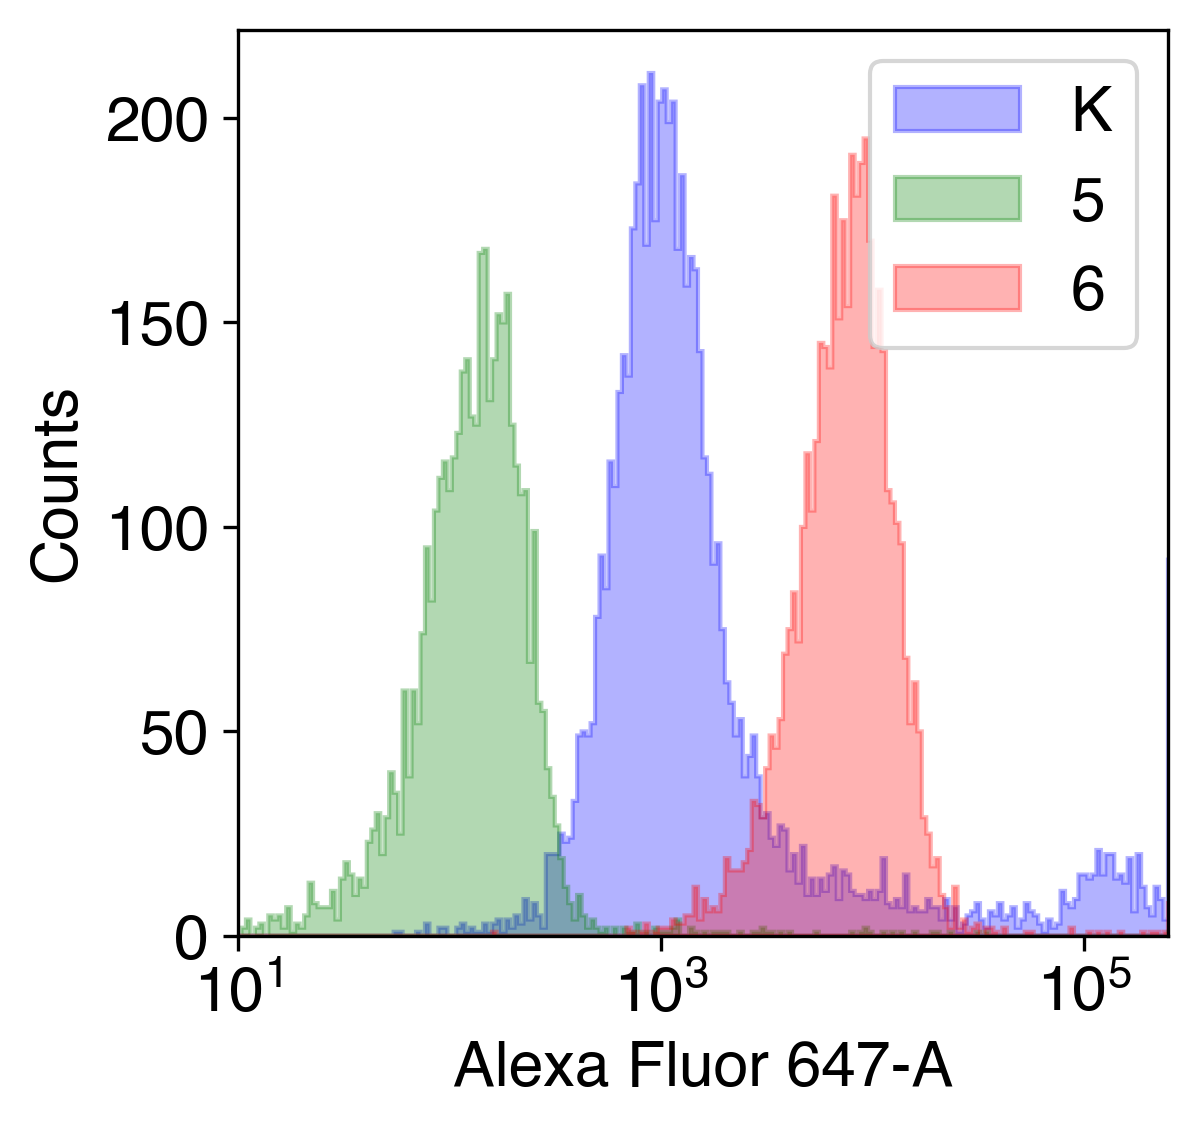

In [15]:
# FITC vs AF647 plot

fig, ax = plt.subplots(1,1,figsize=[4,4], dpi=300)

for i in range(len(filenames_c)):
    # read a fcs file
    fcs = FlowCal.io.FCSData(folder_c + filenames_c[i])
    
    # clean up
    fcs = FlowCal.gate.density2d(fcs, channels=['FSC-A', 'SSC-A'], gate_fraction=0.8)

    #fig, ax = plt.subplots(1,1,figsize=[4,4], dpi=300)
    #ax.set_label(filename)

    ax = FlowCal.plot.hist1d(fcs, channel='Alexa Fluor 647-A', facecolor = col[i], alpha=0.3, \
                             edgecolor = col[i],xscale='log', xlim = (10, 250000), \
                             legend = True, legend_labels = filenames_c[i])

    
    plt.savefig(out_folder + filenames_c[i][:-4] + '_processed_plot.pdf')
plt.show()
plt.close()

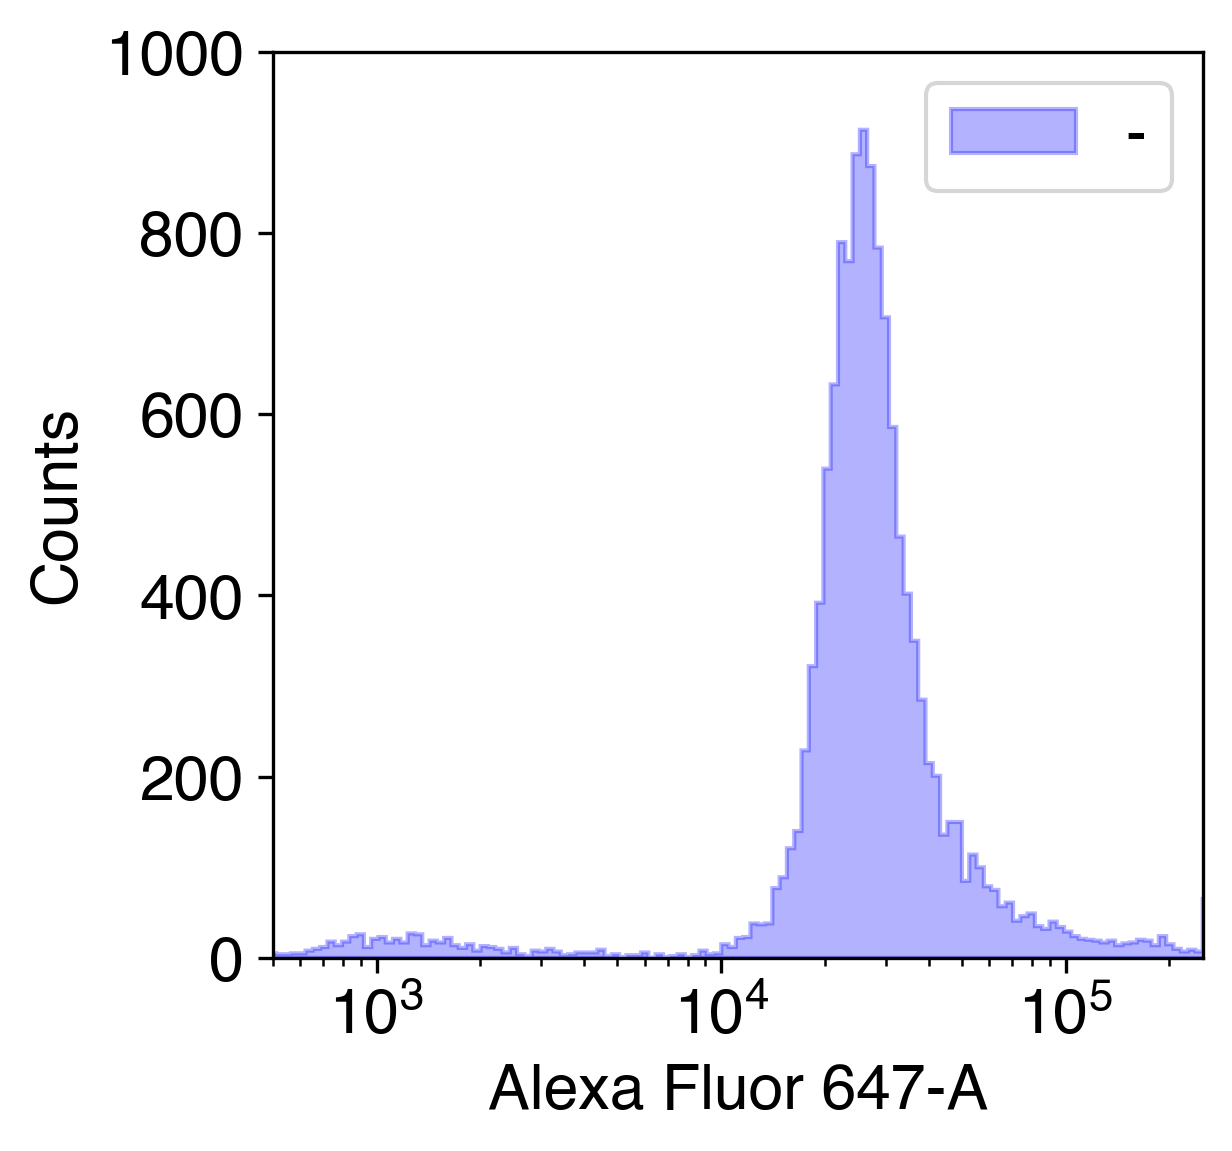

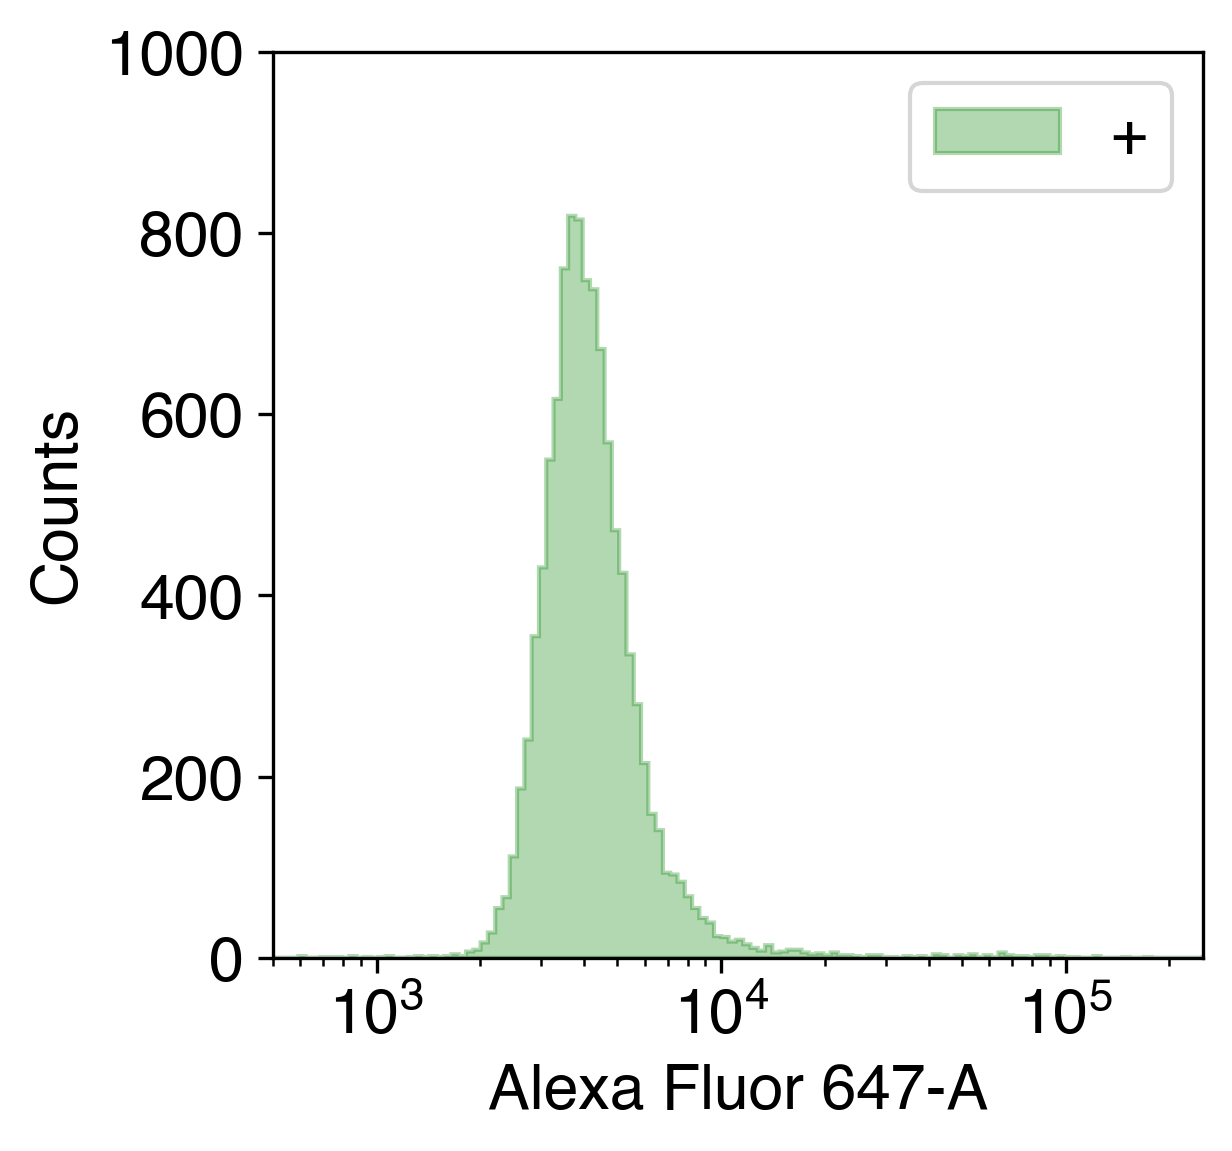

In [16]:
for i in range(len(filenames_b)):
    # read a fcs file
    fcs = FlowCal.io.FCSData(folder_b + filenames_b[i])    
    lab = filenames_b[i][19:-13]
    #ax.set_title(filename)
    fig, ax = plt.subplots(1,1,figsize=[4,4], dpi=300)
    ax = FlowCal.plot.hist1d(fcs, channel='Alexa Fluor 647-A', facecolor = col[i],\
                            edgecolor = col[i],xscale='log', xlim = (500, 250000), ylim = (0, 1000), alpha=0.3, \
                            legend = True, legend_labels = lab)

    plt.savefig(out_folder + lab + '_processed_plot_postcheck.pdf')
    plt.show()
    plt.close()